In [1]:
import numpy as np
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()
data = np.load('lab1_data.npz', allow_pickle=True)['data']

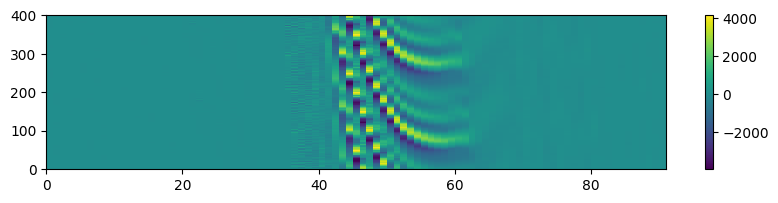

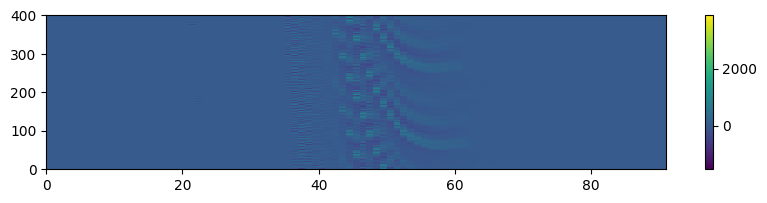

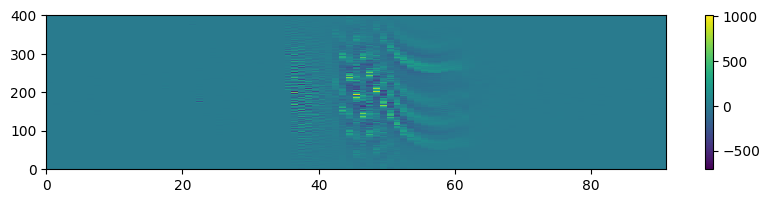

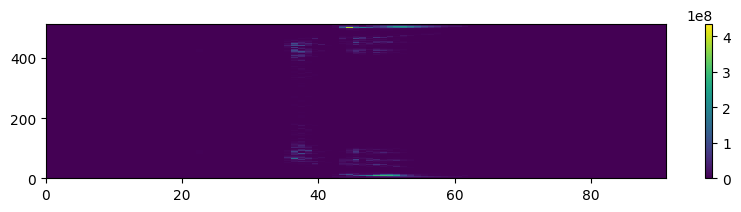

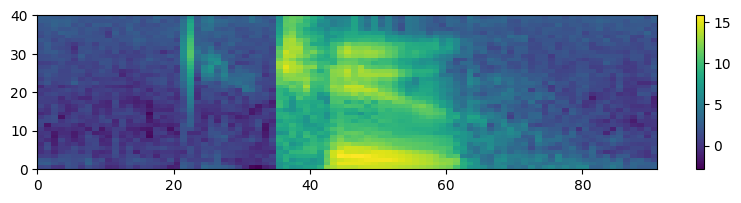

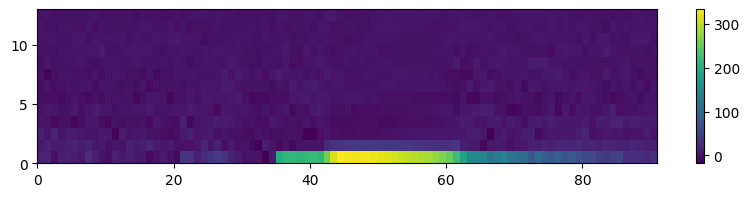

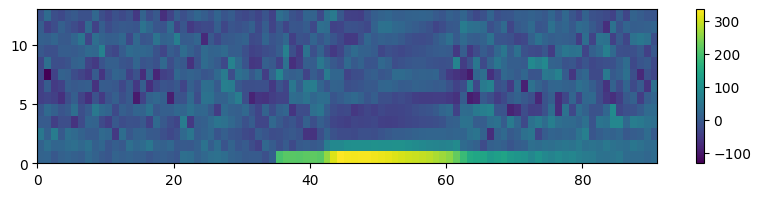

In [17]:
# 4. Mel Frequency Cepstrum Coefficients step-by-step
from lab1_proto import enframe, preemp, windowing, powerSpectrum, mspec, cepstrum, mfcc, plt_draw

winlen = 400
winshift = 200
nfft = 512
nceps = 13

eg_frames = enframe(example['samples'],winlen,winshift)
eg_preemph = preemp(eg_frames)
eg_windowed = windowing(eg_preemph)
eg_spec = powerSpectrum(eg_windowed, nfft)
eg_mspec = mspec(example['samples'])
eg_mfcc = cepstrum(eg_mspec, nceps)
eg_lmfcc = mfcc(example['samples'])

plt_draw(eg_frames)
plt_draw(eg_preemph)
plt_draw(eg_windowed)
plt_draw(eg_spec)
plt_draw(eg_mspec)
plt_draw(eg_mfcc)
plt_draw(eg_lmfcc)

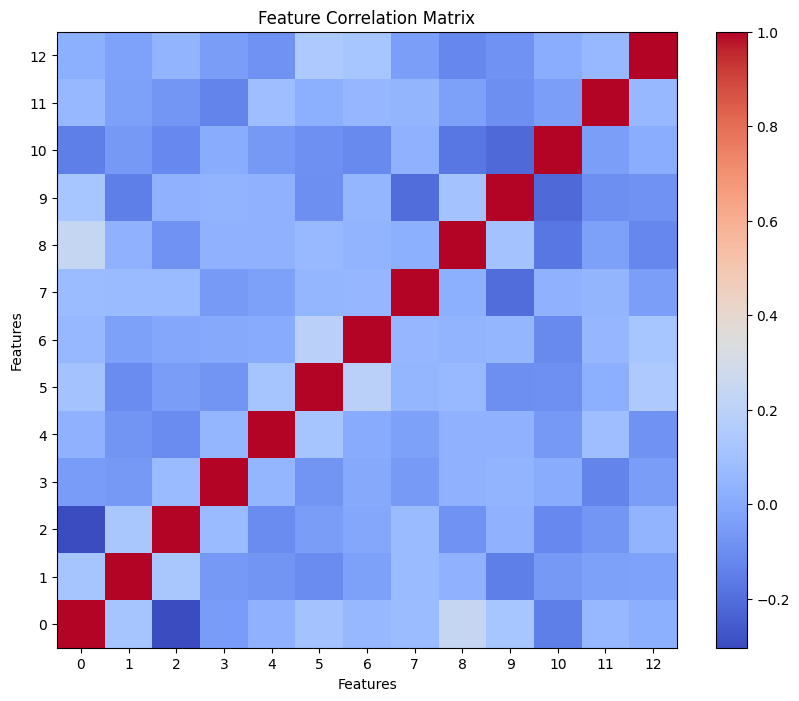

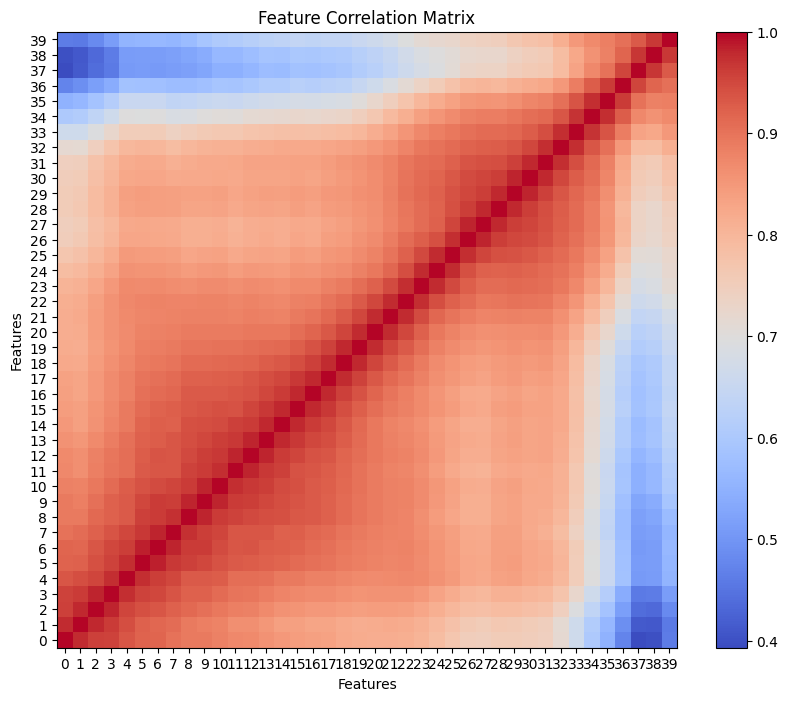

array([[1.        , 0.97652337, 0.95734736, ..., 0.3932683 , 0.39888468,
        0.45991076],
       [0.97652337, 1.        , 0.97932412, ..., 0.41272019, 0.4110981 ,
        0.45879986],
       [0.95734736, 0.97932412, 1.        , ..., 0.43838811, 0.4350724 ,
        0.48198621],
       ...,
       [0.3932683 , 0.41272019, 0.43838811, ..., 1.        , 0.96916459,
        0.93050852],
       [0.39888468, 0.4110981 , 0.4350724 , ..., 0.96916459, 1.        ,
        0.96522253],
       [0.45991076, 0.45879986, 0.48198621, ..., 0.93050852, 0.96522253,
        1.        ]])

In [5]:
# 5. Feature Correlation

from lab1_proto import calc_feature_correlation, mfcc, mspec

feature = None
for utterance in data:
    mfcc_res = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
    feature = mfcc_res if feature is None else np.concatenate((feature, mfcc_res), axis=0)

calc_feature_correlation(feature, plot=True)

feature_mspec = None
for utterance in data:
    mspec_res = mspec(utterance['samples'], samplingrate=utterance['samplingrate'])
    feature_mspec = mspec_res if feature_mspec is None else np.concatenate((feature_mspec, mspec_res), axis=0)

calc_feature_correlation(feature_mspec, plot=True)

Initialization 0
  Iteration 10
Initialization converged: True


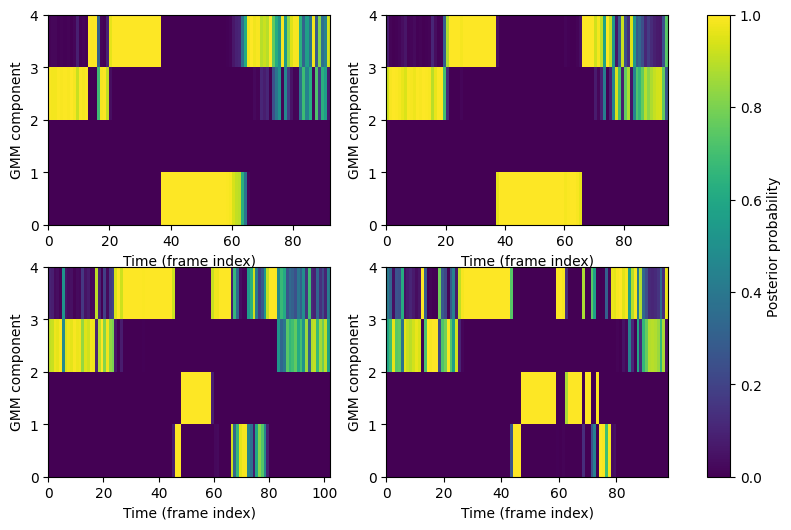

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


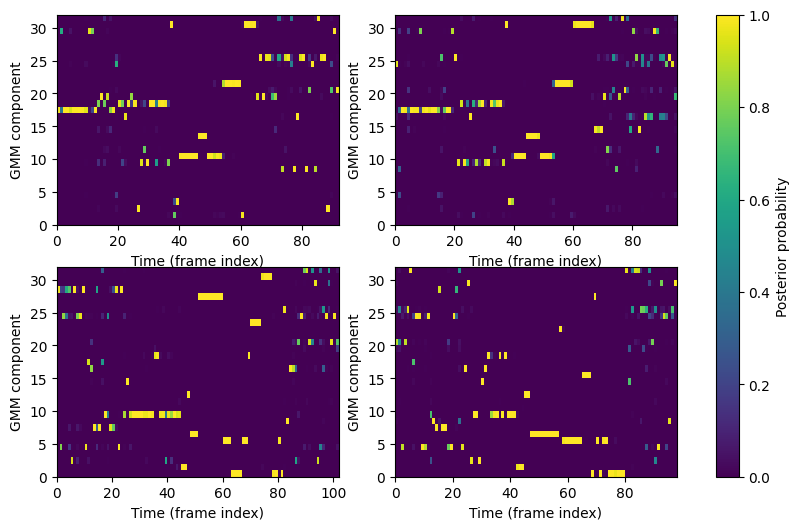

In [11]:
# 6. Speech Segments with Clustering

from lab1_proto import gmm_cluster, gmm_posterior

gmm = gmm_cluster(feature, num_comp=4)
test_feature_list = []
for utterance in data[[16, 17, 38, 39]]: 
    mfcc_res = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
    test_feature_list.append(mfcc_res)
gmm_posterior(gmm, test_feature_list)

gmm = gmm_cluster(feature, num_comp=32)
test_feature_list = []
for utterance in data[[16, 17, 38, 39]]: 
    mfcc_res = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
    test_feature_list.append(mfcc_res)
gmm_posterior(gmm, test_feature_list)

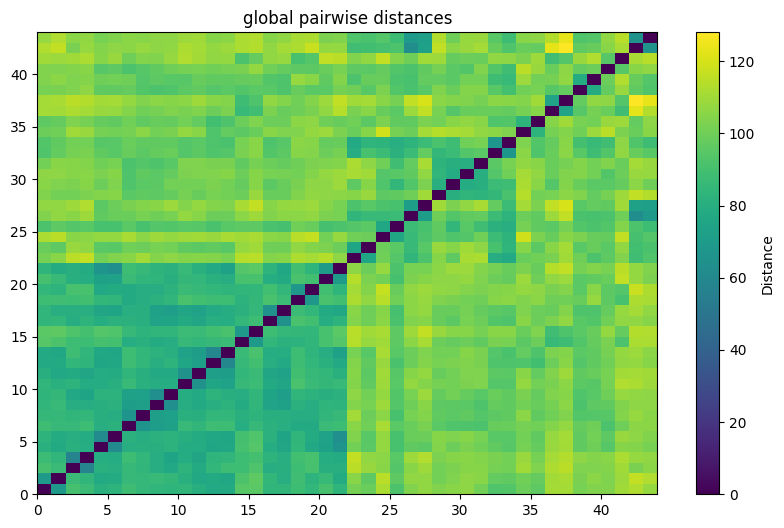

/var/folders/vt/gdkbrdh567x3n9pfsby_66t00000gn/T/ipykernel_19998/3271608855.py:28: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(D, 'complete')


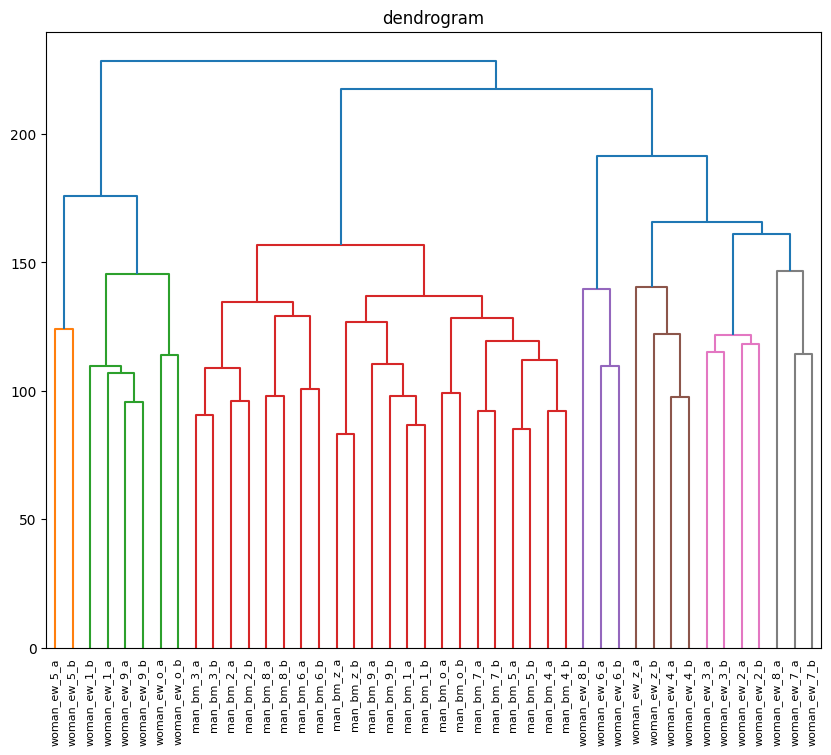

In [12]:
# 7. Comparing Utterances

from lab1_proto import dtw, dist_func, tidigit2labels, plt, dendrogram, linkage

utterance = data[0]
mfcc_x = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
utterance = data[1]
mfcc_y = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
dtw(mfcc_x, mfcc_y, dist=dist_func)

# D = np.zeros((len(data), len(data)))
# for i in range(len(data)):
#     for j in range(len(data)):
#         utterance = data[i]
#         mfcc_x = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
#         utterance = data[j]
#         mfcc_y = mfcc(utterance['samples'], samplingrate=utterance['samplingrate'])
#         D[i, j], _, _ = dtw(mfcc_x, mfcc_y, dist=dist_func)

D = np.load('D_res.npy')
plt.figure(figsize=(10, 6))
plt.pcolormesh(D, shading='auto')
plt.colorbar(label='Distance')
plt.title('global pairwise distances')
plt.show()

Z = linkage(D, 'complete')
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=tidigit2labels(data), leaf_rotation=90)
plt.title('dendrogram')
plt.show()